In [47]:
from sklearn import datasets
import pandas as pd
from matplotlib import cm
%matplotlib inline

In [42]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df ['target_name'] = df.target.apply(lambda x: iris.target_names[x])
df.columns = [i.replace(" (cm)","").replace(" ","_") for i in  df.columns]

In [98]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, stratify=df.target_name)

In [109]:
X_train, y_train = df_train.iloc[:,:4], df_train.target
X_test, y_test = df_test.iloc[:,:4], df_test.target

In [7]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [18]:
print(iris.DESCR[:1000])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

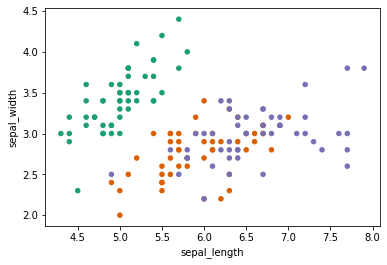

In [63]:
df.plot.scatter(x="sepal_length", y="sepal_width", 
                c=[cm.Dark2.colors[i] for i in df.target])

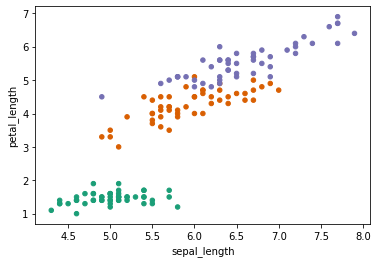

In [64]:
df.plot.scatter(x="sepal_length", y="petal_length", 
                c=[cm.Dark2.colors[i] for i in df.target])

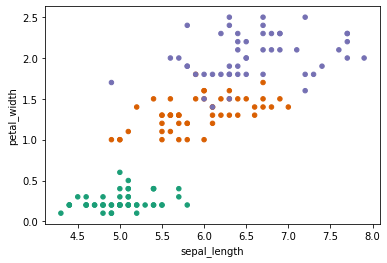

In [65]:
df.plot.scatter(x="sepal_length", y="petal_width", 
                c=[cm.Dark2.colors[i] for i in df.target])

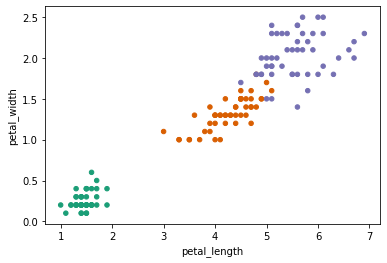

In [66]:
df.plot.scatter(x="petal_length", y="petal_width", 
                c=[cm.Dark2.colors[i] for i in df.target])

## Decision Tree

In [135]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)


[Text(133.92000000000002, 195.696, 'X[2] <= 2.45\ngini = 0.667\nsamples = 112\nvalue = [37, 37, 38]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[2] <= 4.95\ngini = 0.5\nsamples = 75\nvalue = [0, 37, 38]'),
 Text(66.96000000000001, 108.72, 'X[3] <= 1.65\ngini = 0.142\nsamples = 39\nvalue = [0, 36, 3]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(100.44000000000001, 65.232, 'X[1] <= 3.0\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 108.72, 'X[2] <= 5.05\ngini = 0.054\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(234.36, 65.232, 'X[1] <= 2.75\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.8

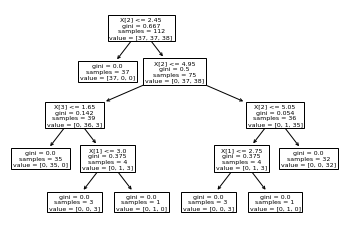

In [141]:
ax = tree.plot_tree(clf);
ax

In [133]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
accuracy_score(y_test, y_hat)

0.9736842105263158